In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
dataset1 = pd.read_csv('/dataset.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values
dataset1.head(10)

,Input,Output
0,78,156
1,12,25
2,45,90
3,91,181
4,33,65
5,60,120
6,25,51
7,55,110
8,82,164
9,18,37


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
    )

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [63]:
# Name:BALA SARAVANAN
# Register Number: 212224230031
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.fc2 = nn.Linear(8,10)
        self.fc3 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        self.history = {'loss' : []}

  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [64]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001) # optim.Adam(ai_brain.parameters(), lr=0.001) || optim.SGD(ai_brain.parameters(), lr=0.01)

In [56]:
# Name: BALA SARAVANAN K
# Register Number: 212224230031

def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
      optimizer.zero_grad()
      loss = criterion(ai_brain(X_train), y_train)
      loss.backward()
      optimizer.step()

      ai_brain.history['loss'].append(loss.item())

      if epoch % 200 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [57]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 14097.653320
Epoch [200/2000], Loss: 13599.954102
Epoch [400/2000], Loss: 12602.645508
Epoch [600/2000], Loss: 11117.407227
Epoch [800/2000], Loss: 9218.104492
Epoch [1000/2000], Loss: 7079.505371
Epoch [1200/2000], Loss: 4981.903320
Epoch [1400/2000], Loss: 3283.344238
Epoch [1600/2000], Loss: 2299.078857
Epoch [1800/2000], Loss: 1966.014404


In [58]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 1818.820435


In [61]:
loss_df = pd.DataFrame(ai_brain.history)

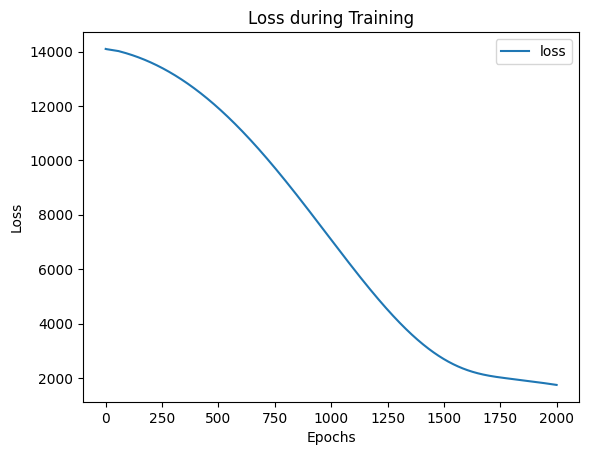

In [62]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [53]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 0.1978248804807663
